<a href="https://colab.research.google.com/github/MXSHOOT/farisarrasyid/blob/master/dicoding_rockpapperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#image classification
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-06 18:38:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.84MB/s    in 45s     

2020-06-06 18:39:32 (6.80 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile, os

In [0]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [18]:
os.listdir(base_dir)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.2
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [31]:
model.fit(
    train_generator,
    steps_per_epoch=31,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=30,
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/30
16/16 - 10s - loss: 1.0869 - accuracy: 0.4258 - val_loss: 1.0461 - val_accuracy: 0.6406
Epoch 2/30
16/16 - 10s - loss: 0.9036 - accuracy: 0.6621 - val_loss: 0.6510 - val_accuracy: 0.8125
Epoch 3/30
16/16 - 10s - loss: 0.5511 - accuracy: 0.7949 - val_loss: 0.4369 - val_accuracy: 0.8672
Epoch 4/30
16/16 - 10s - loss: 0.3833 - accuracy: 0.8789 - val_loss: 0.3494 - val_accuracy: 0.8828
Epoch 5/30
16/16 - 10s - loss: 0.3101 - accuracy: 0.8984 - val_loss: 0.2536 - val_accuracy: 0.9297
Epoch 6/30
16/16 - 10s - loss: 0.2583 - accuracy: 0.9082 - val_loss: 0.2075 - val_accuracy: 0.9297
Epoch 7/30
16/16 - 10s - loss: 0.2043 - accuracy: 0.9336 - val_loss: 0.2022 - val_accuracy: 0.9219
Epoch 8/30
16/16 - 10s - loss: 0.1696 - accuracy: 0.9434 - val_loss: 0.1750 - val_accuracy: 0.9375
Epoch 9/30
16/16 - 10s - loss: 0.4202 - accuracy: 0.8555 - val_loss: 0.3147 - val_accuracy: 0.8828
Epoch 10/30
16/16 - 10s - loss: 0.2331 - accuracy: 0.9264 - val_loss: 0.2285 - val_accuracy: 0.9219
Epoch 11/

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors).png
Rock-paper-scissors_(scissors).png
paper


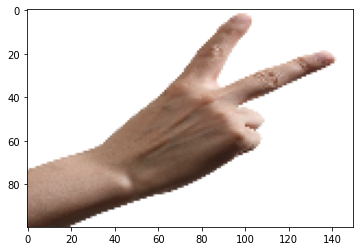

In [42]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predictiong images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scssors')
  else:
    print('unknown')